In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

## Get census tracts file, use to trim the other file to the San Fran area of interest
from: https://hub.arcgis.com/datasets/MTC::san-francisco-bay-region-2020-census-tracts-clipped/about?uiVersion=content-views

In [2]:
census_tracts =  gpd.read_file('../../../data/SpatialData/SanFran/Census_2020_Tracts_SanFran/Census_Tracts_SanFran_2020.shp')
census_tracts = census_tracts.sort_values(by='tractce')
census_tracts = census_tracts[census_tracts['tractce']!='980401']

### Import classifications gpkg file
from: https://github.com/urban-displacement/displacement-typologies/blob/main/data/downloads_for_public/sanfrancisco.gpkg

In [32]:
# gdf = gpd.read_file("../../../data/SpatialData/SanFran/GentrificationIndex_SpatialDomain.shp")

# # Clip tracts to Bay Area
# gdf_bay = gpd.clip(gdf, census_tracts)

# gdf_bay = gdf_bay[gdf_bay.geometry.type == 'Polygon']

# gdf_bay['GEOID'] = gdf_bay['GEOID'].astype(int)
# gdf_bay['GEOID'] = gdf_bay['GEOID'].astype(str)

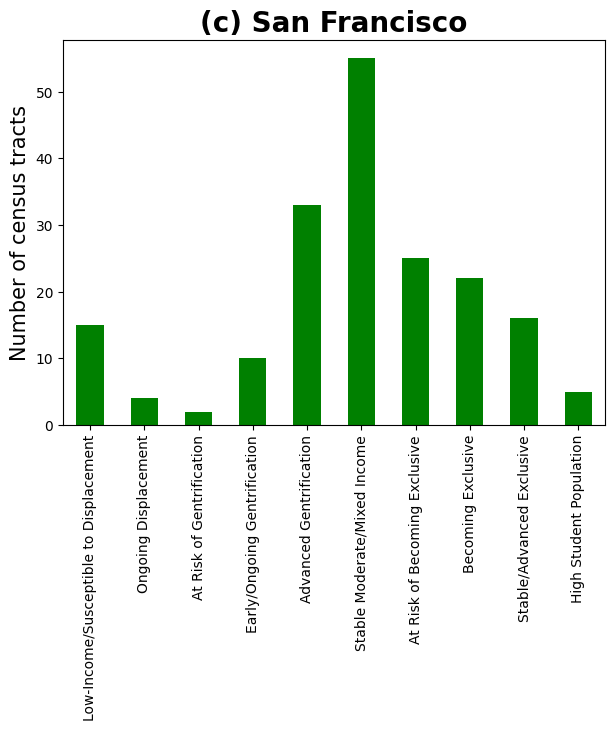

In [4]:
order = ["Low-Income/Susceptible to Displacement", "Ongoing Displacement", "At Risk of Gentrification",
    "Early/Ongoing Gentrification",'Advanced Gentrification', "Stable Moderate/Mixed Income","At Risk of Becoming Exclusive", 
         "Becoming Exclusive", "Stable/Advanced Exclusive", "High Student Population"]

# Make sure classification_new is treated as categorical in the right order
gdf_bay["Typology"] = pd.Categorical(
    gdf_bay["Typology"], categories=order, ordered=True)

# Count with all categories (missing ones get 0)
counts = gdf_bay["Typology"].value_counts().reindex(order, fill_value=0)

# Plot in desired order
fig, ax = plt.subplots(figsize=(7,5))
counts.plot(ax=ax, kind="bar", color="green")
ax.set_xlabel("")
ax.set_ylabel("Number of census tracts", fontsize=15)
ax.set_title('(c) San Francisco', fontsize=20, fontweight = 'bold');
fig.savefig("../Figures/SanFran_Barplot_GI.png", bbox_inches='tight', pad_inches=0.2)   

In [7]:
mapping = {'Low-Income/Susceptible to Displacement': 0,'Ongoing Displacement':0, 'At Risk of Gentrification': 1, 
           'Early/Ongoing Gentrification': 2, 'Advanced Gentrification': 3, 'Stable Moderate/Mixed Income':3,
          'At Risk of Becoming Exclusive':4, 'Becoming Exclusive':4, 'Stable/Advanced Exclusive':4, 'High Student Population':5}
mapping_gi = {'Low-Income/Susceptible to Displacement': 0,'Ongoing Displacement':1, 'At Risk of Gentrification': 2, 
           'Early/Ongoing Gentrification': 3, 'Advanced Gentrification': 4, 'Stable Moderate/Mixed Income':5,
          'At Risk of Becoming Exclusive':6, 'Becoming Exclusive':7, 'Stable/Advanced Exclusive':8, 'High Student Population':9}

In [ ]:
fig, axs = plt.subplots(figsize=(10, 10))

g_index_gdf = g_index_gdf.to_crs(epsg=3857)
g_index_gdf.plot(
    'gi_n',
    ax=axs,
    legend=False,
    edgecolor='black')

ctx.add_basemap(axs, source=ctx.providers.CartoDB.Positron, crs=per_LSOA_summary.crs)
# Create colorbar manually
norm = mpl.colors.Normalize(vmin=g_index_gdf['gi_n'].min(), vmax=g_index_gdf['gi_n'].max())
cmap = plt.cm.get_cmap('viridis')

cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=axs,
    orientation='horizontal',
    fraction=0.046,  # size of colorbar relative to plot
    pad=0.04)
cbar.set_label("Gentrification Idx")
axs.set_title("(a). Manchester", fontsize=20, fontweight='bold')
axs.axis("off");

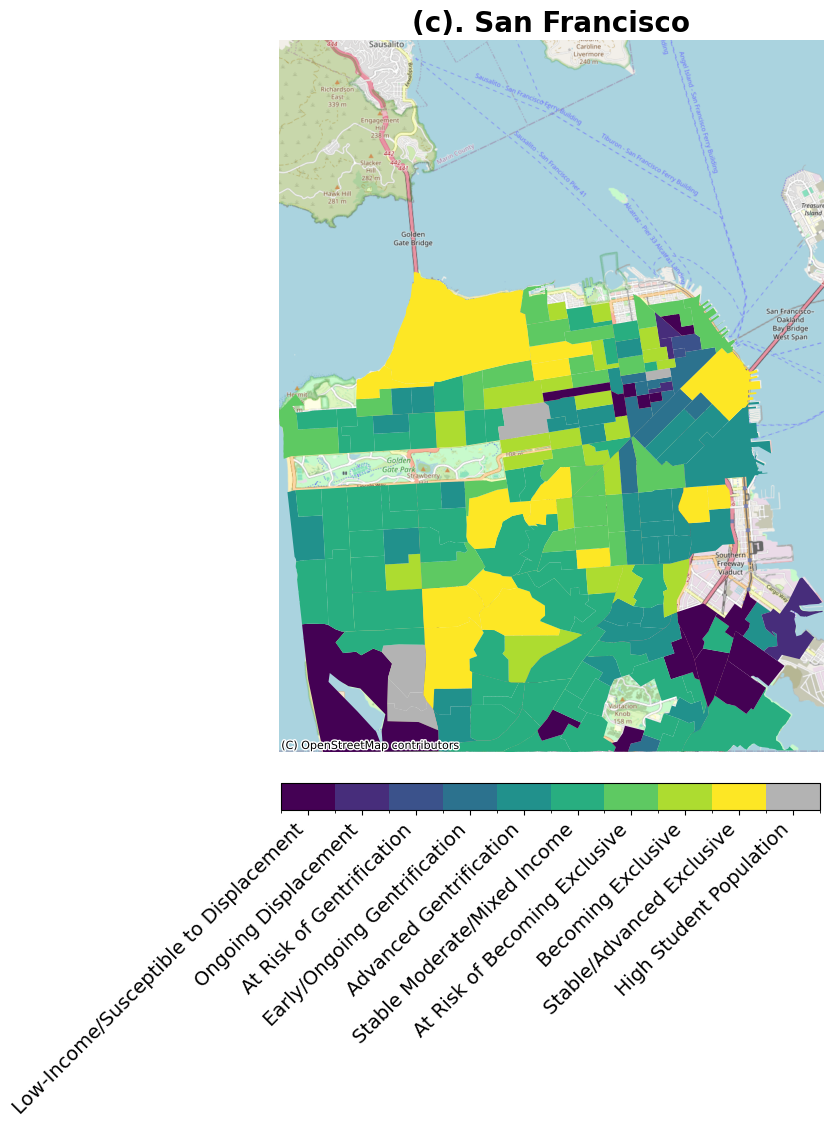

In [37]:
import contextily as ctx
import matplotlib.colors as mcolors

# --- Custom colormap ---
viridis = plt.get_cmap('viridis', 9)
viridis_colors = viridis(np.arange(9))
custom_colors = np.vstack([viridis_colors, [0.7, 0.7, 0.7, 1]])  # add gray
custom_cmap = mcolors.ListedColormap(custom_colors)

bounds = np.arange(-0.5, 10.5, 1)  # edges for 0-9
norm = mcolors.BoundaryNorm(bounds, ncolors=custom_cmap.N)

# --- Reproject to Web Mercator ---
gdf_bay_proj = gdf_bay.to_crs(epsg=3857)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 10))
p0 = gdf_bay_proj.plot(column='Type_code', cmap=custom_cmap, norm=norm, ax=ax)

# Add horizontal colorbar below
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm._A = []
cb0 = fig.colorbar(
    sm,
    ax=ax,
    ticks=np.arange(10),
    fraction=0.035,
    pad=0.04,
    orientation='horizontal'
)
cb0.ax.set_xticklabels(list(mapping.keys()), rotation=45, ha='right')
cb0.ax.tick_params(labelsize=14)

# --- Add basemap ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# --- Trim to GeoDataFrame extent ---
xmin, ymin, xmax, ymax = gdf_bay_proj.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.axis('off')
ax.set_title("(c). San Francisco", fontsize=20, fontweight='bold')

plt.show()
fig.savefig("../Figures/SanFran_GI.png", bbox_inches='tight', pad_inches=0.2)


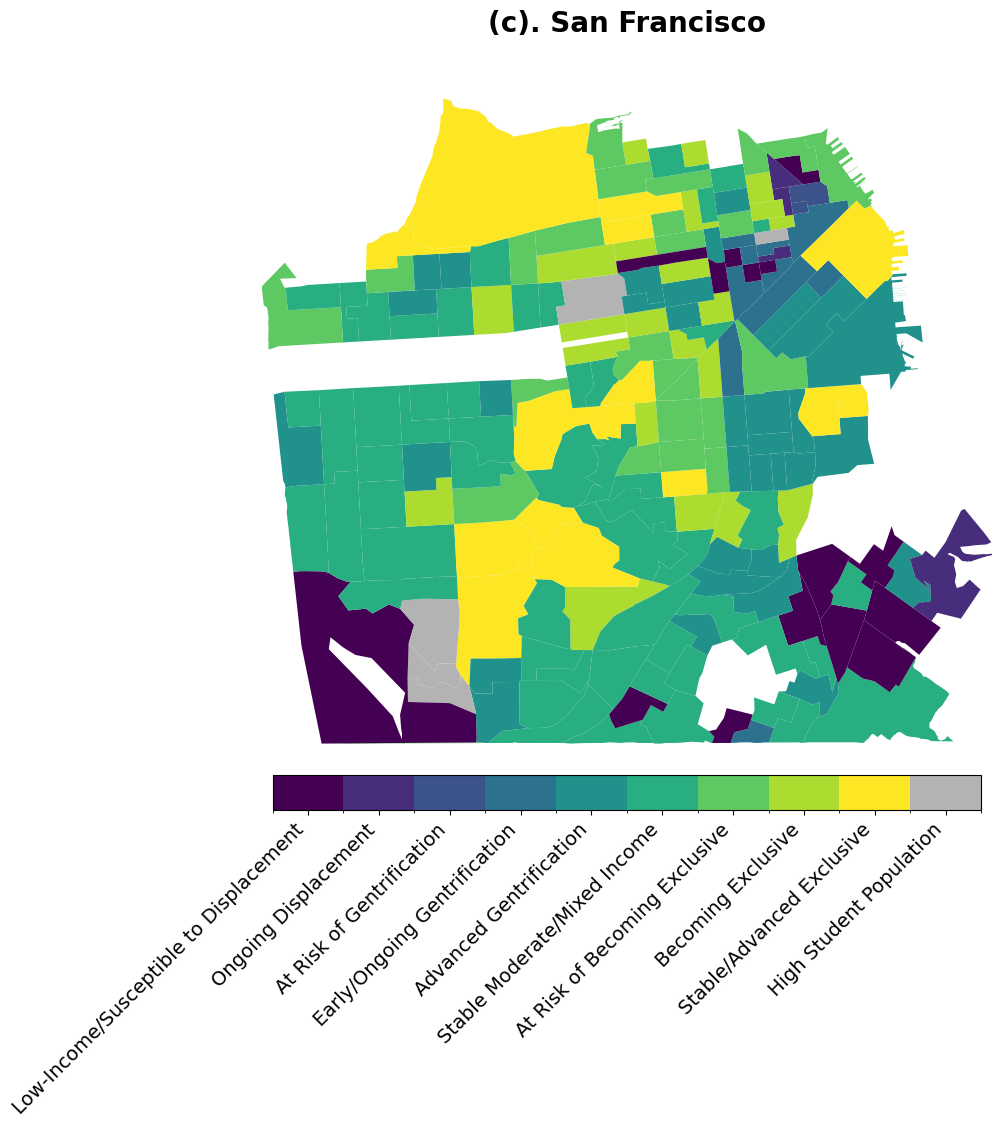

In [34]:
viridis = plt.get_cmap('viridis', 9)
viridis_colors = viridis(np.arange(9))
custom_colors = np.vstack([viridis_colors, [0.7, 0.7, 0.7, 1]])  # add gray
custom_cmap = mcolors.ListedColormap(custom_colors)

# Set up a BoundaryNorm for discrete mapping (edges between each code)
bounds = np.arange(-0.5, 10.5, 1)  # 10 bins for values 0–9
norm = mcolors.BoundaryNorm(bounds, ncolors=custom_cmap.N)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
p0 = gdf_bay.plot(column='Type_code', cmap=custom_cmap, norm=norm, ax=ax)

# Add horizontal colorbar below the plot
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm._A = []  # required for older Matplotlib versions

cb0 = fig.colorbar(
    sm,
    ax=ax,
    ticks=np.arange(10),
    fraction=0.046,
    pad=0.04,
    orientation='horizontal'
)

cb0.ax.set_xticklabels(list(mapping.keys()), rotation=45, ha='right')
cb0.ax.tick_params(labelsize=14)

xmin, ymin, xmax, ymax = gdf_bay.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, 37.82)

ax.axis('off')
ax.set_title("(c). San Francisco", fontsize=20, fontweight = 'bold')
plt.show()
fig.savefig("../Figures/SanFran_GI.png", bbox_inches='tight', pad_inches=0.2)   

### Creating smaller groups

In [ ]:
alternate_mapping = {'Low-Income/Susceptible to Displacement': 0,'Ongoing Displacement':0, 'At Risk of Gentrification': 1, 
           'Early/Ongoing Gentrification': 2, 'Advanced Gentrification': 3, 'Stable Moderate/Mixed Income':3,
          'At Risk of Becoming Exclusive':4, 'Becoming Exclusive':4, 'Stable/Advanced Exclusive':4, 'High Student Population':5}

gdf_bay['Type_code_alternate'] = gdf_bay['Typology'].map(alternate_mapping)

In [ ]:
alternate_mapping = {'Low-Income/Susceptible to Displacement': 0,'Ongoing Displacement':0, 'At Risk of Gentrification': 1, 
           'Early/Ongoing Gentrification': 2, 'Advanced Gentrification': 3, 'Stable Moderate/Mixed Income':3,
          'At Risk of Becoming Exclusive':4, 'Becoming Exclusive':4, 'Stable/Advanced Exclusive':4, 'High Student Population':5}

gdf_bay['Type_code_alternate'] = gdf_bay['Typology'].map(alternate_mapping)

In [ ]:
viridis = plt.get_cmap('viridis', 5)
viridis_colors = viridis(np.arange(5))
custom_colors = np.vstack([viridis_colors, [0.7, 0.7, 0.7, 1]])  # add gray
custom_cmap = mcolors.ListedColormap(custom_colors)

# Set up a BoundaryNorm for discrete mapping (edges between each code)
bounds = np.arange(-0.5, 6.5, 1)  # 10 bins for values 0–9
norm = mcolors.BoundaryNorm(bounds, ncolors=custom_cmap.N)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
p0 = gdf_bay.plot(column='Type_code_alternate',cmap=custom_cmap,norm=norm, ax=ax)

# Add colorbar with correct ticks and labels
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm._A = []  # required for matplotlib < 3.1
cb0 = fig.colorbar(sm, ax=ax, ticks=np.arange(6), fraction=0.04, pad=0.01)
# cb0.set_label("Type_code")
# cb0.ax.set_yticklabels(list(alternate_mapping.keys()))  # Optional: use labels instead of numbers

ax.axis('off')
plt.show()


### Plot with folium

In [1]:
# # Ensure CRS is WGS84 (required by folium)
# gdf_bay_wgs84 = gdf_bay.to_crs(epsg=4326)

# # Factorize Typology to assign a unique color to each category
# typologies = gdf_bay_wgs84['Typology'].fillna('Unknown')
# codes, unique_typologies = pd.factorize(typologies)
# colormap = cm.get_cmap('Set3', len(unique_typologies))  # can use 'tab10', 'Pastel1', etc.
# color_dict = {typ: mcolors.to_hex(colormap(i)) for i, typ in enumerate(unique_typologies)}

# # Set map center (centroid of all geometries)
# center = gdf_bay_wgs84.unary_union.centroid
# m = folium.Map(location=[center.y, center.x], zoom_start=10, tiles='cartodbpositron')

# # Add each tract with color based on Typology
# folium.GeoJson(
#     gdf_bay_wgs84,
#     name="Bay Area Tracts",
#     style_function=lambda feature: {
#         'fillColor': color_dict.get(feature['properties']['Typology'], '#999999'),
#         'color': 'black',
#         'weight': 0.5,
#         'fillOpacity': 0.7,
#     },
#     tooltip=folium.GeoJsonTooltip(fields=['GEOID', 'Typology']),
# ).add_to(m)

# # Add a legend manually
# legend_html = '<div style="position: fixed; bottom: 20px; left: 20px; width: 200px; background: white; padding: 10px; font-size: 12px; border: 1px solid gray;">'
# legend_html += '<b>Typology</b><br>'
# for typ, color in color_dict.items():
#     legend_html += f'<i style="background:{color};width:12px;height:12px;display:inline-block;margin-right:5px;"></i>{typ}<br>'
# legend_html += '</div>'
# m.get_root().html.add_child(folium.Element(legend_html))

# # Save or display
# m.save("bay_area_typology_map.html")
# m
